<img src='https://github.com/Rogerio-mack/work/blob/main/figuras/logo_sbc.png?raw=true' width=250, align="right">

In [169]:
import pandas as pd
import requests
import json
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Case: Dengue Porto Alegre**

Aqui vamos aproximar a série de dados de casos de dengue empregando 2 algoritmos de aprendizado de máquina. Apesar da boa aproximação, é importante você entender as limitações desse procedimento.

In [170]:
# 4314902 = Porto Alegre city geocode
url = 'https://info.dengue.mat.br/api/alertcity'
search_filter = (
    'geocode=4314902&disease=dengue&format=csv&' +
    'ew_start=1&ew_end=50&ey_start=2010&ey_end=2024'
)
df = pd.read_csv('%s?%s' % (url, search_filter))
print(url)
print()

df.index = pd.to_datetime(df['data_iniSE'])
display(df.head())

print()
print(df.shape)
print(df.index.min(), df.index.max())

df.to_csv('dengue_porto_alegre.csv',index=None) # save, para empregarmos no caso de indisponibilidade da api


https://info.dengue.mat.br/api/alertcity



,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2024-05-05,2024-05-05,202419,44.0,7,198,0,4.038185e-03,3.133303,0,4,...,92.688635,90.893977,19.653846,19.923077,NaN,NaN,NaN,NaN,NaN,26924
2024-04-28,2024-04-28,202418,62.0,33,167,25,3.903330e-04,4.415109,0,4,...,94.080013,92.358410,19.428571,19.571429,NaN,NaN,NaN,NaN,NaN,26924
2024-04-21,2024-04-21,202417,59.0,32,142,24,1.454652e-09,4.201474,0,4,...,91.000454,89.518025,18.678571,19.071429,NaN,NaN,NaN,NaN,NaN,26924
2024-04-14,2024-04-14,202416,87.0,63,144,54,3.979120e-04,6.195394,0,4,...,90.445290,88.561908,20.051282,20.384615,NaN,NaN,NaN,NaN,NaN,26924
2024-04-07,2024-04-07,202415,177.0,153,239,147,9.999999e-01,12.604423,0,4,...,88.940192,87.779736,20.571429,20.714286,NaN,NaN,NaN,NaN,NaN,26924



(749, 30)
2010-01-03 00:00:00 2024-05-05 00:00:00


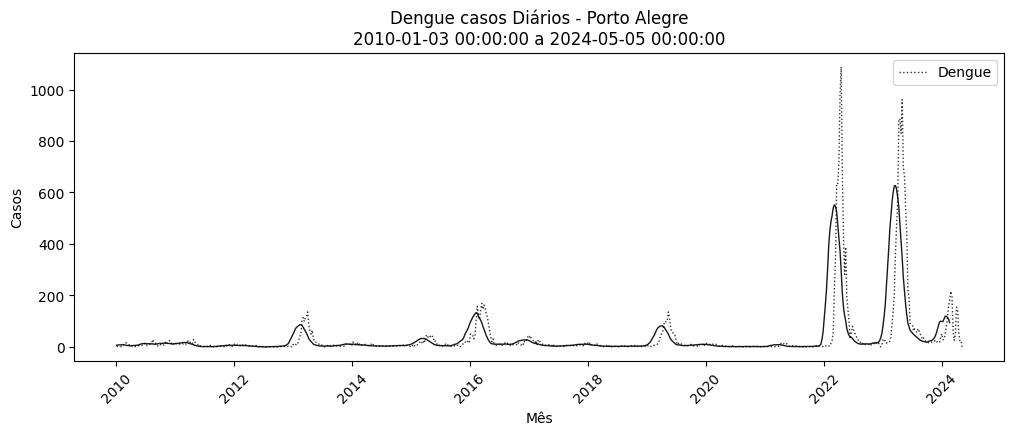

In [171]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(df.casos, label='Dengue', color='k', alpha=.8, linestyle=':', lw=1)
ax1.plot(df.casos.rolling(12).mean(), color='k', alpha=.9, lw=1)

plt.xlabel('Mês')
plt.ylabel('Casos')
plt.title('Dengue casos Diários - Porto Alegre\n' + str(df.index.min()) + ' a ' + str(df.index.max()))
plt.xticks(rotation=45)
ax1.legend()

plt.show()


# Ex1.

Separe somente os dados que serão empregados aqui. Empregaremos os `casos` e  `tempmed` como uma variável exógena para ajudar-nos na previsão. Vamos também empregar somente dados a partir de 2021 (por quê?). Exiba em um gráfico os dados obtidos em conjunto com a média dos valores ao longo de 30 dias (`rolling(30)`).

In [172]:
df = df[ (df.index.year >= 2021) ][['casos','tempmed']]

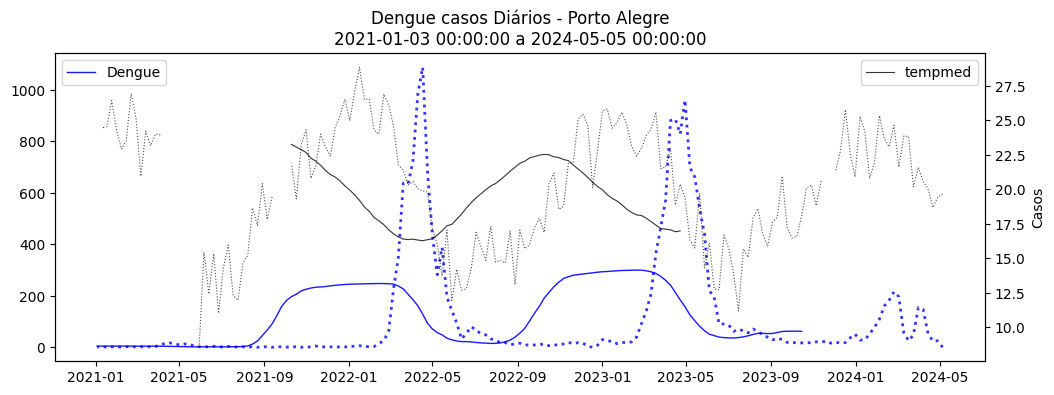

In [173]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(df.casos, color='b', alpha=.8, linestyle=':', lw=2)
ax1.plot(df.casos.rolling(30).mean(), label='Dengue', color='b', alpha=.9, lw=1)

ax2 = ax1.twinx()

for tipo, color in zip(['tempmed'],['k']):
  ax2.plot(df[tipo], color=color, alpha=.7, linestyle=':', lw=0.8)
  ax2.plot(df[tipo].rolling(30).mean(), label=tipo, color=color, alpha=.8, lw=0.8)

plt.xlabel('Mês')
plt.ylabel('Casos')
plt.title('Dengue casos Diários - Porto Alegre\n' + str(df.index.min()) + ' a ' + str(df.index.max()))
plt.xticks(rotation=45)

ax1.legend(loc='upper left')
ax2.legend()

plt.show()

# Ex2.

Você deve ter observado vários valores ausentes. Preencha esses valores empregando a função `interpolate()` (pacote `pandas`) e exiba novamente os valores.

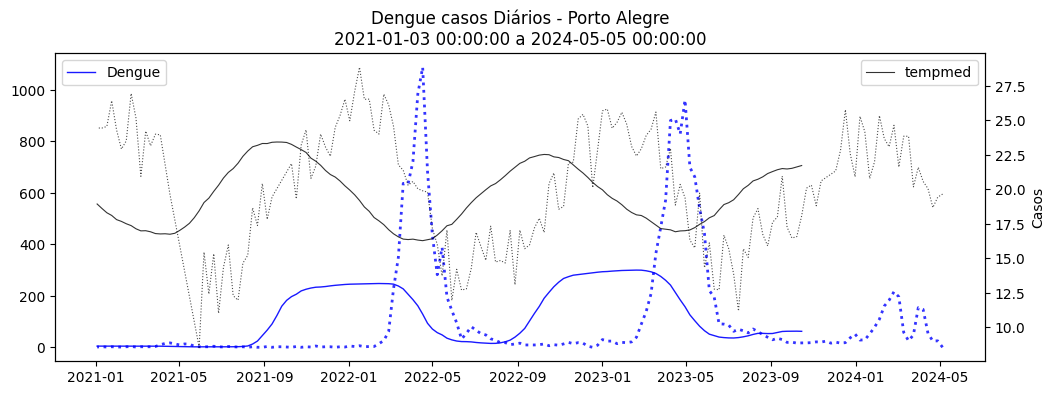

In [174]:
df = df.interpolate()

fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(df.casos, color='b', alpha=.8, linestyle=':', lw=2)
ax1.plot(df.casos.rolling(30).mean(), label='Dengue', color='b', alpha=.9, lw=1)

ax2 = ax1.twinx()

for tipo, color in zip(['tempmed'],['k']):
  ax2.plot(df[tipo], color=color, alpha=.7, linestyle=':', lw=0.8)
  ax2.plot(df[tipo].rolling(30).mean(), label=tipo, color=color, alpha=.8, lw=0.8)

plt.xlabel('Mês')
plt.ylabel('Casos')
plt.title('Dengue casos Diários - Porto Alegre\n' + str(df.index.min()) + ' a ' + str(df.index.max()))
plt.xticks(rotation=45)

ax1.legend(loc='upper left')
ax2.legend()

plt.show()

# Ex3.

Prepare os dados para o aprendizado de máquina da série temporal.

1. Verifique os torne os dados da série ordenados por data
2. Empregue lag 1 a 4 para os casos (nr de casos dos dias -1, -2, -3 e -4 como preditores) e lag 1 para temperatura (por que?)

Experimente diferentes regressores e faça a predição para os 30% dias finais da série e compare com a série original.

In [175]:
df = df.sort_index()

In [176]:
shift = 0

df['casos-1'] = df['casos'].shift(shift+1)
df['casos-2'] = df['casos'].shift(shift+2)
df['casos-3'] = df['casos'].shift(shift+3)
df['casos-4'] = df['casos'].shift(shift+4)

df['tempmed'] = df['tempmed'].shift(shift+1)

df = df.dropna()
df.head()

,casos,tempmed,casos-1,casos-2,casos-3,casos-4
data_iniSE,,,,,,
2021-01-31,1,26.423246,2.0,1.0,2.0,1.0
2021-02-07,1,24.310527,1.0,2.0,1.0,2.0
2021-02-14,2,22.921053,1.0,1.0,2.0,1.0
2021-02-21,3,23.513158,2.0,1.0,1.0,2.0
2021-02-28,1,26.947368,3.0,2.0,1.0,1.0


In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor


In [178]:
regressor_predictions = {}

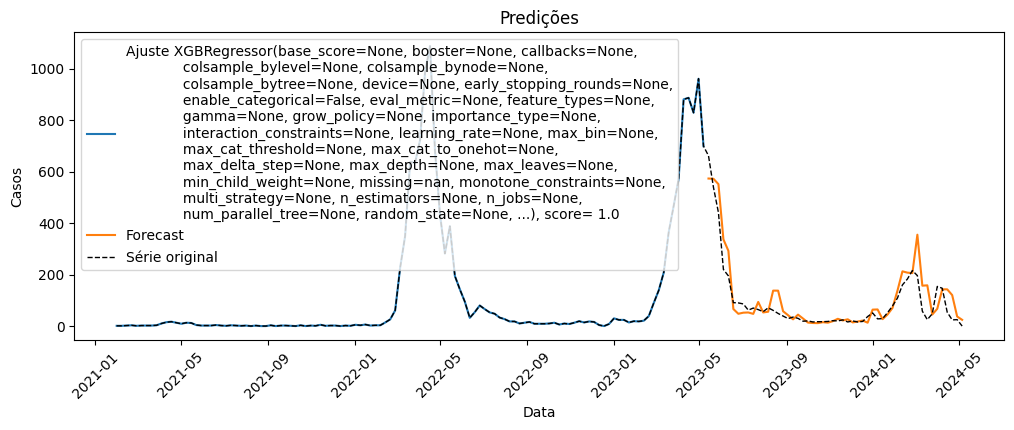

In [190]:
train_size = int(len(df) * 0.70)
train_data, test_data = df.iloc[0:train_size], df.iloc[train_size:len(df)]

X_train, y_train, X_test, y_test = train_data.drop(columns='casos'), train_data[['casos']], test_data.drop(columns='casos'), test_data[['casos']]

# modelo
model = DecisionTreeRegressor()
# model = SVR()
# model = LinearRegression()
# model = RandomForestRegressor()
# model = XGBRegressor()
# model = AdaBoostRegressor()

# treinamento do modelo
model.fit(X_train, y_train)

# predição com o modelo treinado
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

regressor_predictions[model.__class__.__name__] = test_predict

# show results
plt.figure(figsize=(12, 4))

plt.plot(df.iloc[0:train_size].index, train_predict,label='Ajuste ' + str(model) + ', score= ' + str(np.round(model.score(X_train,y_train),2)))
plt.plot(df.iloc[train_size:len(df)].index, test_predict,label='Forecast')
plt.plot(df.casos,'k--',label='Série original',lw=1)

plt.legend(loc='upper left',fontsize=10)
plt.title('Predições')
plt.xlabel('Data')
plt.ylabel('Casos')

plt.xticks(rotation=45)
plt.show()

# Ex4.

Calcule as métricas de erro e compare os vários classificadores. Qual apresenta melhor resultado?

In [191]:
import statsmodels.tools.eval_measures as eval_measures

def error_measures(y, y_pred):

    mae = np.mean(np.abs(y_pred - y))                  # MAE
    mse = np.mean((y_pred - y)**2)                     # MSE
    rmse = eval_measures.rmse(y, y_pred, axis=0)       # RMSE from statsmodels
    # rmse = np.mean((y_pred - y)**2)**.5              # RMSE
    mape = np.mean(np.abs(y_pred - y)/np.abs(y))       # MAPE

    metrics = {'MSE':mse, 'MAE': mae, 'RMSE':rmse, 'MAPE':mape}

    for key, value in metrics.items():
      print(f'{key}: \t {value:.4f}')

    return metrics

In [192]:
for model_name, y_predict in regressor_predictions.items():
  print(model_name)
  print()
  _ = error_measures(y_predict.ravel(), y_test.values.ravel())
  print()
  print()

DecisionTreeRegressor

MSE: 	 7612.5385
MAE: 	 49.8462
RMSE: 	 87.2499
MAPE: 	 0.4933


AdaBoostRegressor

MSE: 	 4897.8044
MAE: 	 44.2577
RMSE: 	 69.9843
MAPE: 	 0.5858


SVR

MSE: 	 20721.9595
MAE: 	 75.4648
RMSE: 	 143.9512
MAPE: 	 3.4017


LinearRegression

MSE: 	 2331.8183
MAE: 	 29.4329
RMSE: 	 48.2889
MAPE: 	 0.5972


RandomForestRegressor

MSE: 	 4670.3406
MAE: 	 38.0667
RMSE: 	 68.3399
MAPE: 	 0.3555


XGBRegressor

MSE: 	 2873.5559
MAE: 	 35.1517
RMSE: 	 53.6056
MAPE: 	 0.3864


